start
[2 2 2 ... 0 0 0]
count_1 =  3469
count_2 =  2252
count_3 =  1927
count_4 =  0


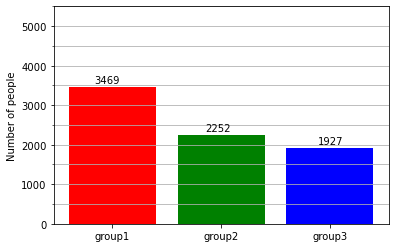

7648
end


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
print('start')
count = 0
total_count = 0
w2v_similar = set()
similar_count = []
commodity_feature = {}
count_list = []
total_user = []
group_one = []
group_two = []
group_three = []
group_four = []
count1 = 0
#def set_default(obj):
#    if isinstance(obj, set):
#        return list(obj)
#    raise TypeError

def WriteToJson(json_name,data):
    with open(json_name, 'w', encoding ='utf-8') as f: 
        json.dump(data, f,ensure_ascii = False)
    f.close()

with open('word2vec_similar_total1', 'r', encoding ='utf-8') as f:
    data = json.load(f)
    for i in data:
        count = count + 1
        w2v_similar.add(i[0])
        similar_word_user_dict = i[0]
        globals()[similar_word_user_dict]={"similar_word":[]}
        for j in range(0,len(i)):
            globals()[similar_word_user_dict]["similar_word"].append(i[j])            
            total_count = total_count + 1
        #print(i)
        #print(globals()[similar_word_user_dict]["similar_word"])

#print(w2v_similar)
#print(['android'])
similar_count = [0]*len(w2v_similar)


with open('total_ckip_nosplit_final_修正4', 'r', encoding ='utf-8') as f:
     data = json.load(f)
f.close()
for i in data:
    #print(count1)
    count1 = count1 + 1
    i['commodity_feature'] = set([])
    word = set()
    for user_comment in i['user_comment_ckip']:
        for k in range(0,len(user_comment)):
            for j,x in enumerate(w2v_similar):
                if user_comment[k] in [x]:
                    
                    
                    #print(globals()[x]["similar_word"])
                    word.add(user_comment[k])
                    #i['commodity_feature'].add(user_comment[k])
                    #print(i['commodity_feature'])
                    i['commodity_feature'] = [word]
                    #print(type(i['commodity_feature']))
                    #print(i['commodity_feature'])
                    similar_count[j] = 1
                    #commodity_feature[x].append['0']
    
    
    
    if i['commodity_feature']:
        globals()[i['user_id']]={"user_id":"","user_comment":[],"user_comment_ckip":[]}
        total_user.append(i['user_id'])
        commodity_feature[i['user_id']] = similar_count
        globals()[i['user_id']]['user_id'] = i['user_id']
        globals()[i['user_id']]['user_comment'] = i['user_comment']
        globals()[i['user_id']]['user_comment_ckip'] = i['user_comment_ckip']
        #globals()[i['user_id']]['commodity_feature'].append(i['commodity_feature'])
        #print(globals()[i['user_id']])
    similar_count = [0]*len(w2v_similar)
    
    

for i,j in commodity_feature.items():
    #print(i,j)
    count_list.append(j)
    total_user.append(i)

df = pd.DataFrame(count_list)
k = 3
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
kmeans = cluster.KMeans(n_clusters=k, random_state=12)
kmeans.fit(df)
#print(len(kmeans.labels_))
for i,j in enumerate(kmeans.labels_):
    if j == 0:
        group_one.append(globals()[total_user[i]])
        count_1 = count_1 + 1
        #print(type(group_zero))
        #print('第0組',total_user[i],j)
    if j == 1:
        group_two.append(globals()[total_user[i]])
        count_2 = count_2 + 1
        #print('第1組',total_user[i],j)
    if j == 2:
        group_three.append(globals()[total_user[i]])
        count_3 = count_3 + 1
    #if j == 3:
    #    group_four.append(globals()[total_user[i]])
    #    count_4 = count_4 + 1
        #print('第2組',total_user[i],j)
#print(type(group_zero))


print(kmeans.labels_)
WriteToJson('group_nosplit_one',group_one)
WriteToJson('group_nosplit_two',group_two)
WriteToJson('group_nosplit_three',group_three)
#WriteToJson('group_four',group_four)
print('count_1 = ',count_1)
print('count_2 = ',count_2)
print('count_3 = ',count_3)
print('count_4 = ',count_4)

students = ['group1', 'group2', 'group3']
#students = ['group1', 'group2', 'group3', 'group4']
math_scores = [count_1, count_2, count_3]
#math_scores = [count_1, count_2, count_3, count_4]
#math_scores = [4988, 1698, 701, 1793]
x = np.arange(len(students))
plt.bar(x, math_scores, color=['red', 'green', 'blue'])
#plt.bar(x, math_scores, color=['red', 'green', 'blue', 'yellow'])
plt.xticks(x, students)
ax=plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(MultipleLocator(500))
ax.yaxis.grid(True,which='major')
ax.yaxis.grid(True,which='minor')
plt.text(-0.170, count_1+90, str(count_1))
plt.text(0.85, count_2+90, str(count_2))
plt.text(1.894, count_3+90, str(count_3))
plt.ylim(0,5500)
#plt.text(2.880, 1793+90, str('1793'))
#plt.text(2.83, count_4+90, str(count_4))
plt.ylabel('Number of people')
#plt.title('Final Term')
plt.savefig('nosplit_segmentation.png', dpi=300)
plt.show()
total = count_1 + count_2 +count_3 + count_4
print(total)
#plt.legend(['Accuracy','Loss'], loc = 'center right')
print('end')
#print(user_information)